## Support Vector Machines

Support Vecotr Machine (SVM) are a method that uses points in a transformed problem space that best seperate classes into two groups.

Classificiation for multiple classes in then supported by a one-vs-all method (just like we previously did for Logistic Regression for Multi Class Classification) 

The lecture section will be broken up by the following sections: 
    Part 1: Introduction to Support Vecotr Machines
    Part 2: SVM General Explaination
    Part 3: Computing the Hyperplane
    Part 4: Additional Math Resources
    Part 5: SVM with Sci Kit Learn
    Part 6: Additional Resources

## Part 1: Introduction to Support Vector Machines

For Explaination: 

In macine learning, support vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data and recognize patterns, used for classification and regression analysis. Given a set of training examples, each marked for belonging to one of the two categories, an SVM training algorithm builds a model that assigns new examples into one category or the other, making it a non-probabilistics binary linear classifier.

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separtecategoreis are divided by  a clear gap that is as wide as possible. 

New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap that fall on. 

The advantages of support vector machines are: 
    - effective in high dimensional spaces
    - still effective in cases where number of dimensions is greater than the number of samples
    - Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient
    - Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels. 

The disadvanrages of support vector machines include: 
    - if the number of features is much greater than the number of samples, the method is likely to give poor performances.
    - SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

## k-fold cross-validation

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. 

Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. 

The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. 

The k results from the folds can then be averaged to produce a single estimation. 

The advantage of this method over repeated random sub-sampling (see below) is that all observations are used for both training and validation, and each observation is used for validation exactly once. 

## Part 2: SVM General Explaination
    
    We'll start by imagining a situation in which we want to separate a training set with two classes. 
    We have two classes in our set, blue and red. We plot them out in the future space and we try to place a green line that seperates both classes.

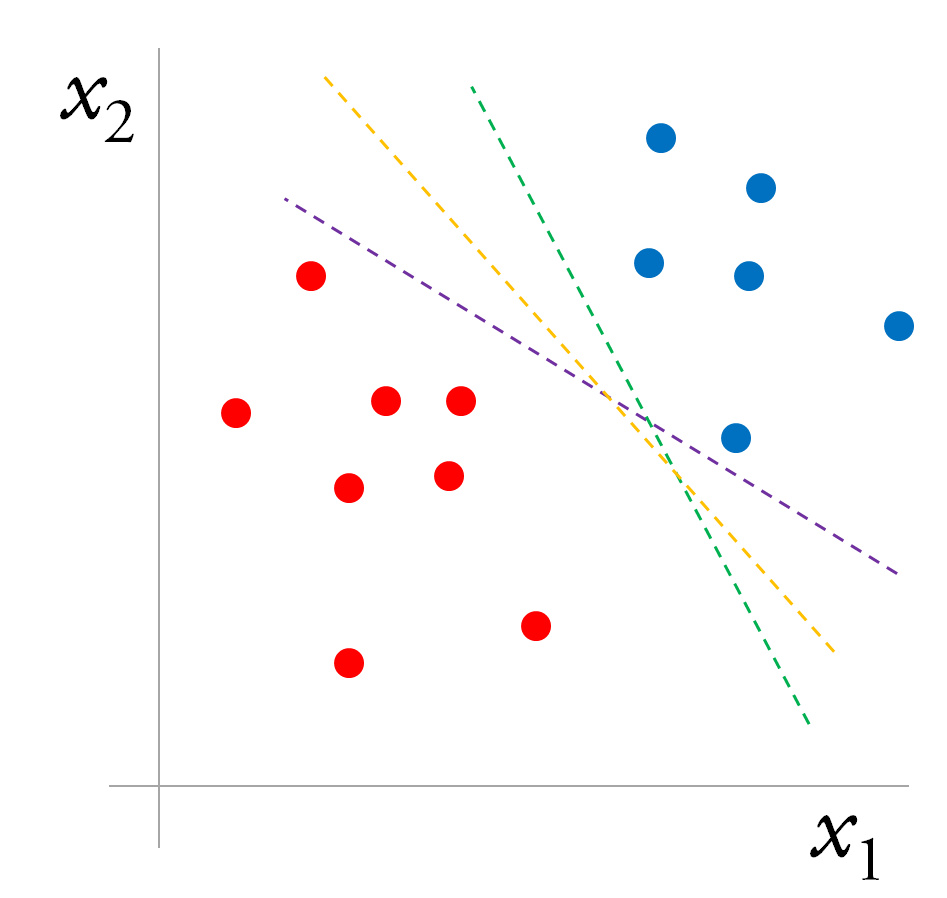

In [5]:
from IPython.display import Image
url= "http://efavdb.com/wp-content/uploads/2015/05/binaryclass_2d.png"
Image(url,width=400, height=400)

useful link and resources for Support Vector Machine Learning: http://efavdb.com/svm-classification/

From the image above we see that we have multiple ways of drawing this line (which we will call a hyperplane) that can separate the classes completely. So which is the optimal line? 

We decide that the optimal hyperplane that separte the these two classes is that one with the maximun margin between the two classes as seen in the image below: 

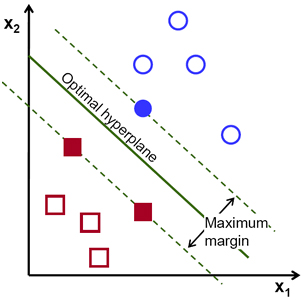

In [8]:
url= 'https://ngoodall.files.wordpress.com/2015/03/hyperlane-example.jpg'
Image(url)

So how do we actually mathematically compute that optimal hyperplane? I'll explain with a very brief overview below in Part 3, but I highly suggest you check out the full explanation on Wikipedia or in the lecture videos following Part 3.



## Part 3: Computing the Hyperplane
    
    Let's go ahead and start by defining the Hyperplane in this case with the equation of a line, where Beta tranposed is the known weight vector of the features we've seen before and Beta nought is the bias.

f(x)=β0+(β^T)x

There are an infinite number of ways we could scale the weight vector and the bias, but remember we want to maximize the margin between the two classes. So we realize through some math (explained in detail the videos below) can set this as:

|β0+(β^T)x|=1

where x symbolizes the training examples closest to the hyperplane. In general, the training examples that are closest to the hyperplane are called support vectors. These support vectors are filled in with color in the image above. This representation is known as the canonical hyperplane.

From geometry we know that the distance betweeen a point x and the hyperplane (Beta,Beta0)is:

distance=|β0+(β^T)x|/||β||.

In particular, for the canonical hyperplane, the numerator is equal to one and the distance to the support vectors is

distance support vectors=|β0+(β^T)x||/|β||=1/||β||

Recall that the margin introduced in the previous section, here denoted as M, is twice the distance to the closest examples:

M=2/||β||

Finally, the problem of maximizing M is equivalent to the problem of minimizing a function L(Beta) subject to some constraints. The constraints model the requirement for the hyperplane to classify correctly all the training examples xi.

Formally,

minβ,β0L(β)=(1/2)*(||β||^2) subject to yi(βTxi+β0)≥1 ∀i

where yi represents each of the labels of the training examples.

This is a problem of Lagrangian optimization that can be solved using Lagrange multipliers to obtain the weight vector Beta and the bias Beta0 of the optimal hyperplane.

If we want to do non-linear classification we can employ the kernel trick. Using the kernel trick we can "slice" the feature space with a Hyperplane. For a quick illustraion of what this looks like, check out both the image and the video below!

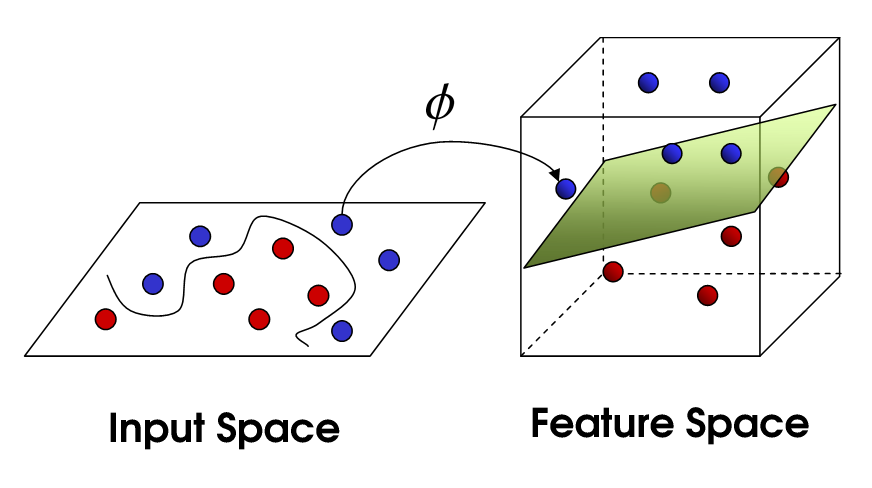

In [9]:
# Kernel Trick for the Feature Space
url='http://i.imgur.com/WuxyO.png'
Image(url)

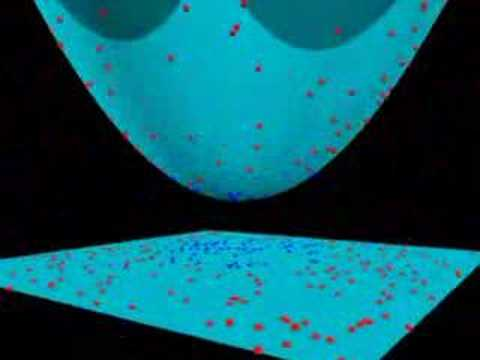

In [10]:
# Kernel Trick Visualization
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

## Part 4: Additional Math Resources
Below are video links to free resources for a deeper dive into the mathematics of Support Vector Machines. First a lecture by Andrew Ng and then a lecture from MIT Open CourseWare

In [12]:
# Andrew Ng Lecture
YouTubeVideo('wtno4WSDTlY&index=76&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW')

### MIT Lecture

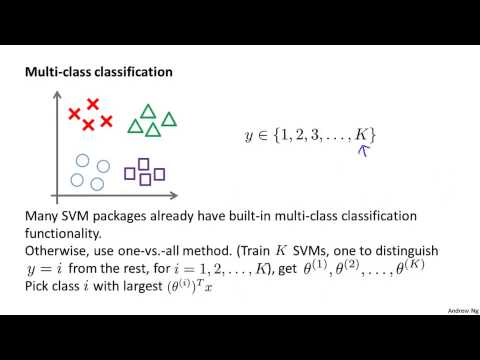

In [14]:
# MIT Lecture
YouTubeVideo('wtno4WSDTlY')

## Part 5: SVM with Sci Kit Learn
Now we are ready to jump into some Python code and Sci Kit Learn, we'll start with some basic imports and we will import Sci Kit Learn along the way while we use it.

In [39]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First we'll start by importing the Data set we are already very familiar with, the Iris Data Set


In [16]:
from sklearn import datasets

#load the iris datasets
iris = datasets.load_iris()

X = iris.data
Y = iris.target

print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Now we will import the SVC (Support Vector Classification) from the SVM library of Sci Kit Learn, I encourage you to check out the other types of SVM options in the Sci Kit Learn Documentation!

In [17]:
from sklearn.svm import SVC

In [18]:
#create a Support Vecotr Classification model for the data.
#Fit a SVM model to the data
model = SVC()

Now we split the data into a training set and a testing set and then train our model.

In [19]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [20]:
#SVC model.fit
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
from sklearn import metrics

predicted = model.predict(X_test)
expected = Y_test

print (metrics.accuracy_score(expected,predicted))

0.973684210526


Looks like we have achieved a 97.4 % accuracy with Support Vector Classification!

Now that we've gone through a basic implementation of SVM lets go ahead and quickly explore the various kernel types we can use for classification. We can do this by plotting out the boundaries created by each kernel type! We'll start with some imports and by setting up the data.

The four methods we will explore are two linear models, a Gaussian Radial Basis Function,and a SVC with a polynomial (3rd Degree) kernel.

The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

In [23]:
#import all SVM

from sklearn import svm

# We'll use all the data and not bother with a split between training and testing. We'll also only use two features.
X = iris.data[:,:2]
Y = iris.target

#SVM regularization parameter
C = 1.0

#SVC with a Linear Kernel (our original example)
svc = svm.SVC(kernel="linear", C=C).fit(X,Y)

#Gaussion Radial Bassis Function
rbf_svc = svm.SVC(kernel="rbf", gamma=0.7, C=C).fit(X,Y)

#SVC with 3rd degree polynomial
poly_svc = svm.SVC(kernel="poly", degree=3, C=C).fit(X,Y)

#SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)


Now that we have fitted the four models, we will go ahead and begin the proess of setting up the visual plots. Note: This example is taken from the Sci Kit Learn Docmention. 

First we define a mesh to plot in. We define the max and min of the plot for the y and x axis by the smallest and largest feature in the data set. We can use numpy's built in mesh grid method to construct our plot.

In [27]:
# Set the step size
h = 0.02

# X axis min and max
x_min = X[:,0].min()-1
x_max = X[:,0].max()+1

# Y axis min and max
y_min = X[:,1].min()-1
y_max = X[:,1].max()+1

#Finally, numpy can create a meshgrid
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [28]:
#title for the plots
titles = ["SVC with linear kernel",
         "LinearSVC (linear kernel)",
         "SVC with RBF kernel",
         "SVC with polynomial (degree 3) kernel"]

Finally we will go through each model, set its position as a subplot, then scatter the data points and draw a countour of the decision boundaries.

//anaconda/lib/python3.5/site-packages/matplotlib/contour.py:919: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


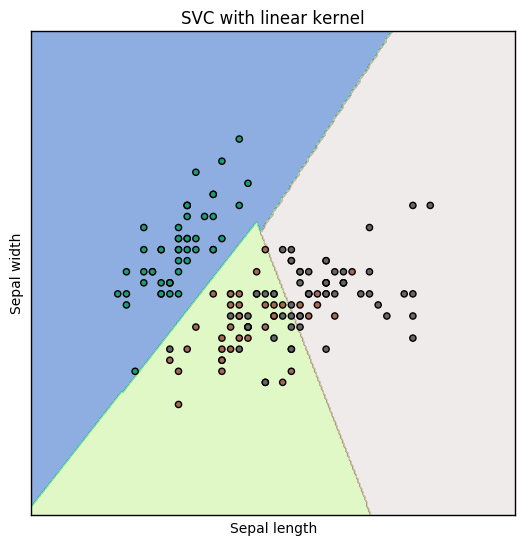

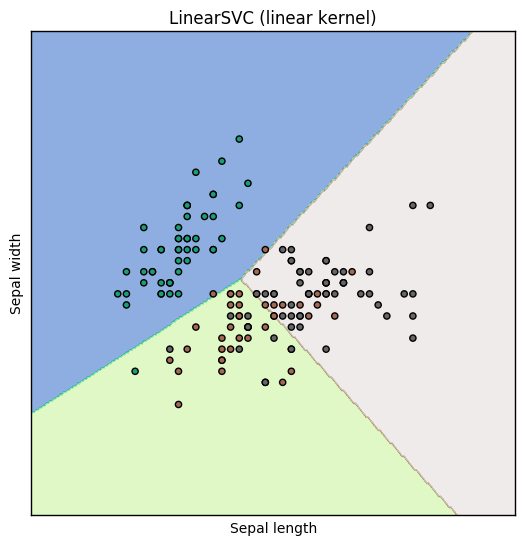

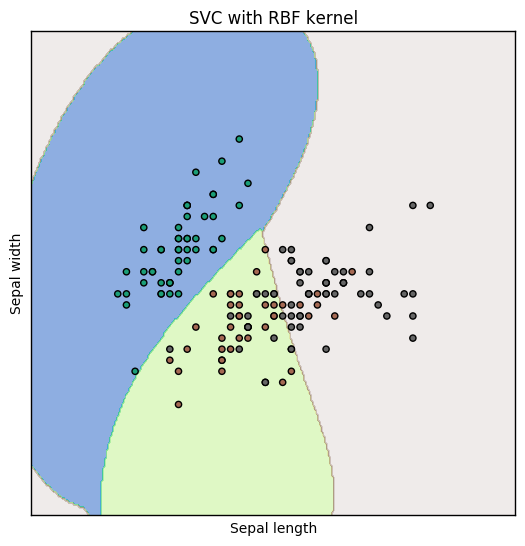

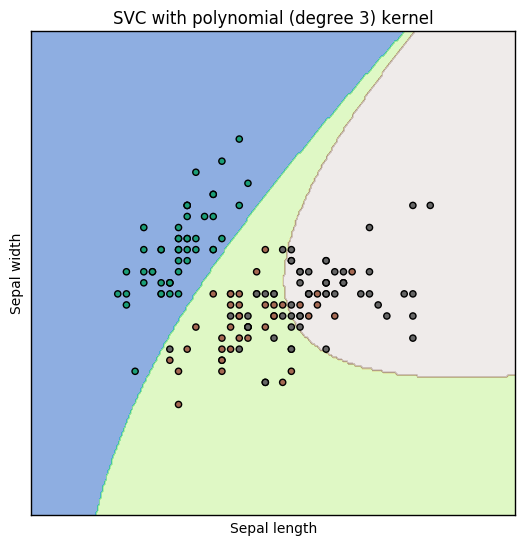

In [38]:
# Use enumerate for a count
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(15,15))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2, 2, i + 1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    


plt.show()

In [37]:
%matplotlib inline